## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import os
# set random seed
SEED = 321
np.random.seed(SEED)

## Part 1

In [2]:
# Loading in the dataset
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'
df = pd.read_csv(url)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [3]:
df['SizeRank'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 22467 entries, 0 to 22466
Series name: SizeRank
Non-Null Count  Dtype
--------------  -----
22467 non-null  int64
dtypes: int64(1)
memory usage: 175.6 KB


In [4]:
# Filtering for the 4 largest cities into a new dataframe
df2 = df.query("SizeRank in (0,1,2,3)")
df2

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [5]:
df2['RegionType'].value_counts()

city    4
Name: RegionType, dtype: int64

In [6]:
# Melting the dates into 1 column

# Dropping StateName since it is already stated in State
# Dropping RegionID because we are creating a new index
# Dropping RegionType due to that it has only 1 value
# Dropping Metro due to that it has data that is unnecesary
# Dropping SizeRank since we already have the largest cities filtered
melted = pd.melt(df2.drop(columns=['StateName',
                                   'RegionID',
                                   'RegionType',
                                   'Metro',
                                   'SizeRank']),
                id_vars=['RegionName', 'State', 'CountyName'],
                value_name='HomeValue', var_name="Date")
melted

,RegionName,State,CountyName,Date,HomeValue
0,New York,NY,Queens County,2000-01-31,253690.0
1,Los Angeles,CA,Los Angeles County,2000-01-31,234181.0
2,Houston,TX,Harris County,2000-01-31,109068.0
3,Chicago,IL,Cook County,2000-01-31,166139.0
4,New York,NY,Queens County,2000-02-29,255517.0
...,...,...,...,...,...
1087,Chicago,IL,Cook County,2022-08-31,315587.0
1088,New York,NY,Queens County,2022-09-30,781622.0
1089,Los Angeles,CA,Los Angeles County,2022-09-30,966595.0
1090,Houston,TX,Harris County,2022-09-30,272639.0


In [7]:
# Changing the Date column into datetime
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   State       1092 non-null   object        
 2   CountyName  1092 non-null   object        
 3   Date        1092 non-null   datetime64[ns]
 4   HomeValue   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 42.8+ KB


In [8]:
# Setting the index to Date 
melted = melted.set_index("Date")
melted

,RegionName,State,CountyName,HomeValue
Date,,,,
2000-01-31,New York,NY,Queens County,253690.0
2000-01-31,Los Angeles,CA,Los Angeles County,234181.0
2000-01-31,Houston,TX,Harris County,109068.0
2000-01-31,Chicago,IL,Cook County,166139.0
2000-02-29,New York,NY,Queens County,255517.0
...,...,...,...,...
2022-08-31,Chicago,IL,Cook County,315587.0
2022-09-30,New York,NY,Queens County,781622.0
2022-09-30,Los Angeles,CA,Los Angeles County,966595.0


In [9]:
# Grouping by city and resampling for monthly frequency
df_ts = melted.groupby('RegionName').resample("M").mean()
df_ts

C:\Users\amnam\AppData\Local\Temp\ipykernel_7300\1396410053.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").mean()
C:\Users\amnam\AppData\Local\Temp\ipykernel_7300\1396410053.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").mean()
C:\Users\amnam\AppData\Local\Temp\ipykernel_7300\1396410053.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shoul

HomeValue
RegionName Date                 
Chicago    2000-01-31   166139.0
           2000-02-29   166536.0
           2000-03-31   167368.0
           2000-04-30   168826.0
           2000-05-31   170499.0
...                          ...
New York   2022-05-31   768797.0
           2022-06-30   773944.0
           2022-07-31   777692.0
           2022-08-31   779960.0
           2022-09-30   781622.0

[1092 rows x 1 columns]

## Part 2

In [10]:
# Unstacking the dataframe
unstacked = df_ts.unstack(level=0)
unstacked

HomeValue                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [11]:
unstacked.isna().sum()

           RegionName 
HomeValue  Chicago        3
           Houston        1
           Los Angeles    0
           New York       1
dtype: int64

In [12]:
unstacked = unstacked.dropna()
unstacked.isna().sum()

           RegionName 
HomeValue  Chicago        0
           Houston        0
           Los Angeles    0
           New York       0
dtype: int64

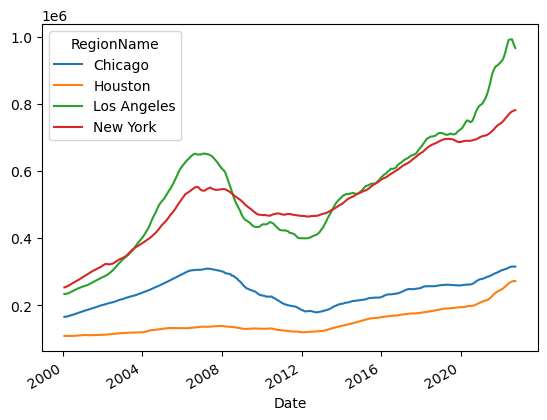

In [13]:
# Plotting the new unstacked dataframe
ax = unstacked['HomeValue'].plot()

In [14]:
# Creating tick locators and formatters
# For major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

In [15]:
# Setting a function
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

# Creating the formatter
fmt_thous = mticks.FuncFormatter(thousands)

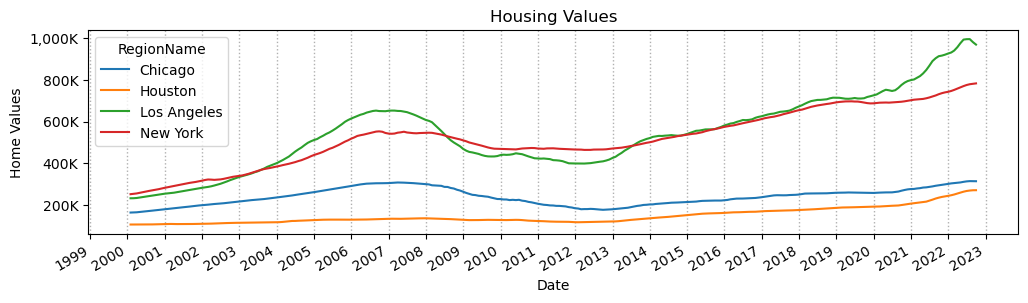

In [16]:
# Plotting the new unstacked dataframe
ax = unstacked['HomeValue'].plot(style='-',title="Housing Values",
                                 ylabel='Home Values',
                                 figsize=(12,3))

# Setting the formatter
ax.yaxis.set_major_formatter(fmt_thous)

# Major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)

# Making major/minor gridlines
ax.grid(which='major',axis='x',ls=":",lw=1)

### Q1: Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [17]:
max_cols = ['HomeValue']
plot_df = unstacked.loc['2008', max_cols]
plot_df

HomeValue                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2008-01-31  300207.0  138208.0    603029.0  546538.0
2008-02-29  296063.0  137512.0    596635.0  546098.0
2008-05-31  293467.0  136228.0    554589.0  537685.0
2008-06-30  288495.0  135773.0    539622.0  533810.0
2008-07-31  288174.0  135392.0    524220.0  529211.0
2008-08-31  283199.0  134770.0    510520.0  525290.0
2008-09-30  280695.0  133932.0    500124.0  521347.0
2008-10-31  274849.0  133189.0    490979.0  518048.0
2008-11-30  271059.0  132247.0    481905.0  514767.0
2008-12-31  265306.0  131283.0    469294.0  510309.0

In [18]:
max_value = plot_df['HomeValue'].max()
max_value

RegionName
Chicago        300207.0
Houston        138208.0
Los Angeles    603029.0
New York       546538.0
dtype: float64

In [19]:
min_value = plot_df['HomeValue'].min()
min_value

RegionName
Chicago        265306.0
Houston        131283.0
Los Angeles    469294.0
New York       510309.0
dtype: float64

Los Angeles had the highest Typical Home value of 603,029 and Houston had the least with 131,283.

### Q2: How much did the home values change from November 2008 to December 2008 (in dollars)?

In [20]:
# Filtering for between 10/2008 and 12/2008 
chg_cols = ['HomeValue']
plot_df = unstacked.loc['11/2008':'12/2008', chg_cols]
plot_df

HomeValue                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2008-11-30  271059.0  132247.0    481905.0  514767.0
2008-12-31  265306.0  131283.0    469294.0  510309.0

In [21]:
ts_diff = plot_df.diff()
ts_diff

HomeValue                             
RegionName   Chicago Houston Los Angeles New York
Date                                             
2008-11-30       NaN     NaN         NaN      NaN
2008-12-31   -5753.0  -964.0    -12611.0  -4458.0

Home value changes by city(in dollars):

Chicago = -$5,753 

Houston = -$964

Los Angeles = -$12,611

New York = -$4,458